## Projeto Completo

**Melhor local para construção valorizar**

*Autor: Danillo de Souza*
    
**Objetivo:** Verificar em qual bairro da Califórnia um empresário do ramo imobiliário deve construir residências para vender e obter o maior lucro. Considerando um investimento inicial fixo de R$ 200.000,00.

In [1]:
# Importar os módulos

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

**Análise Exploratória**

In [2]:
df = pd.read_csv('../../dataframes/housing.csv', sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Preparação dos Dados**

In [5]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
idCat, cat = pd.factorize(df['ocean_proximity'])
df['ocean_proximity_cat'] = idCat
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_cat
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,2


In [10]:
df['total_rooms_per_households'] = df['total_rooms'] / df['households']
df['total_bedrooms_per_households'] = df['total_bedrooms'] / df['households']

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_cat,total_rooms_per_households,total_bedrooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,6.281853,1.081081


In [11]:
df.drop(['total_rooms', 'total_bedrooms'], axis=1, inplace=True)

df.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_cat,total_rooms_per_households,total_bedrooms_per_households
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,6.281853,1.081081


**Plotagem dos Dados**

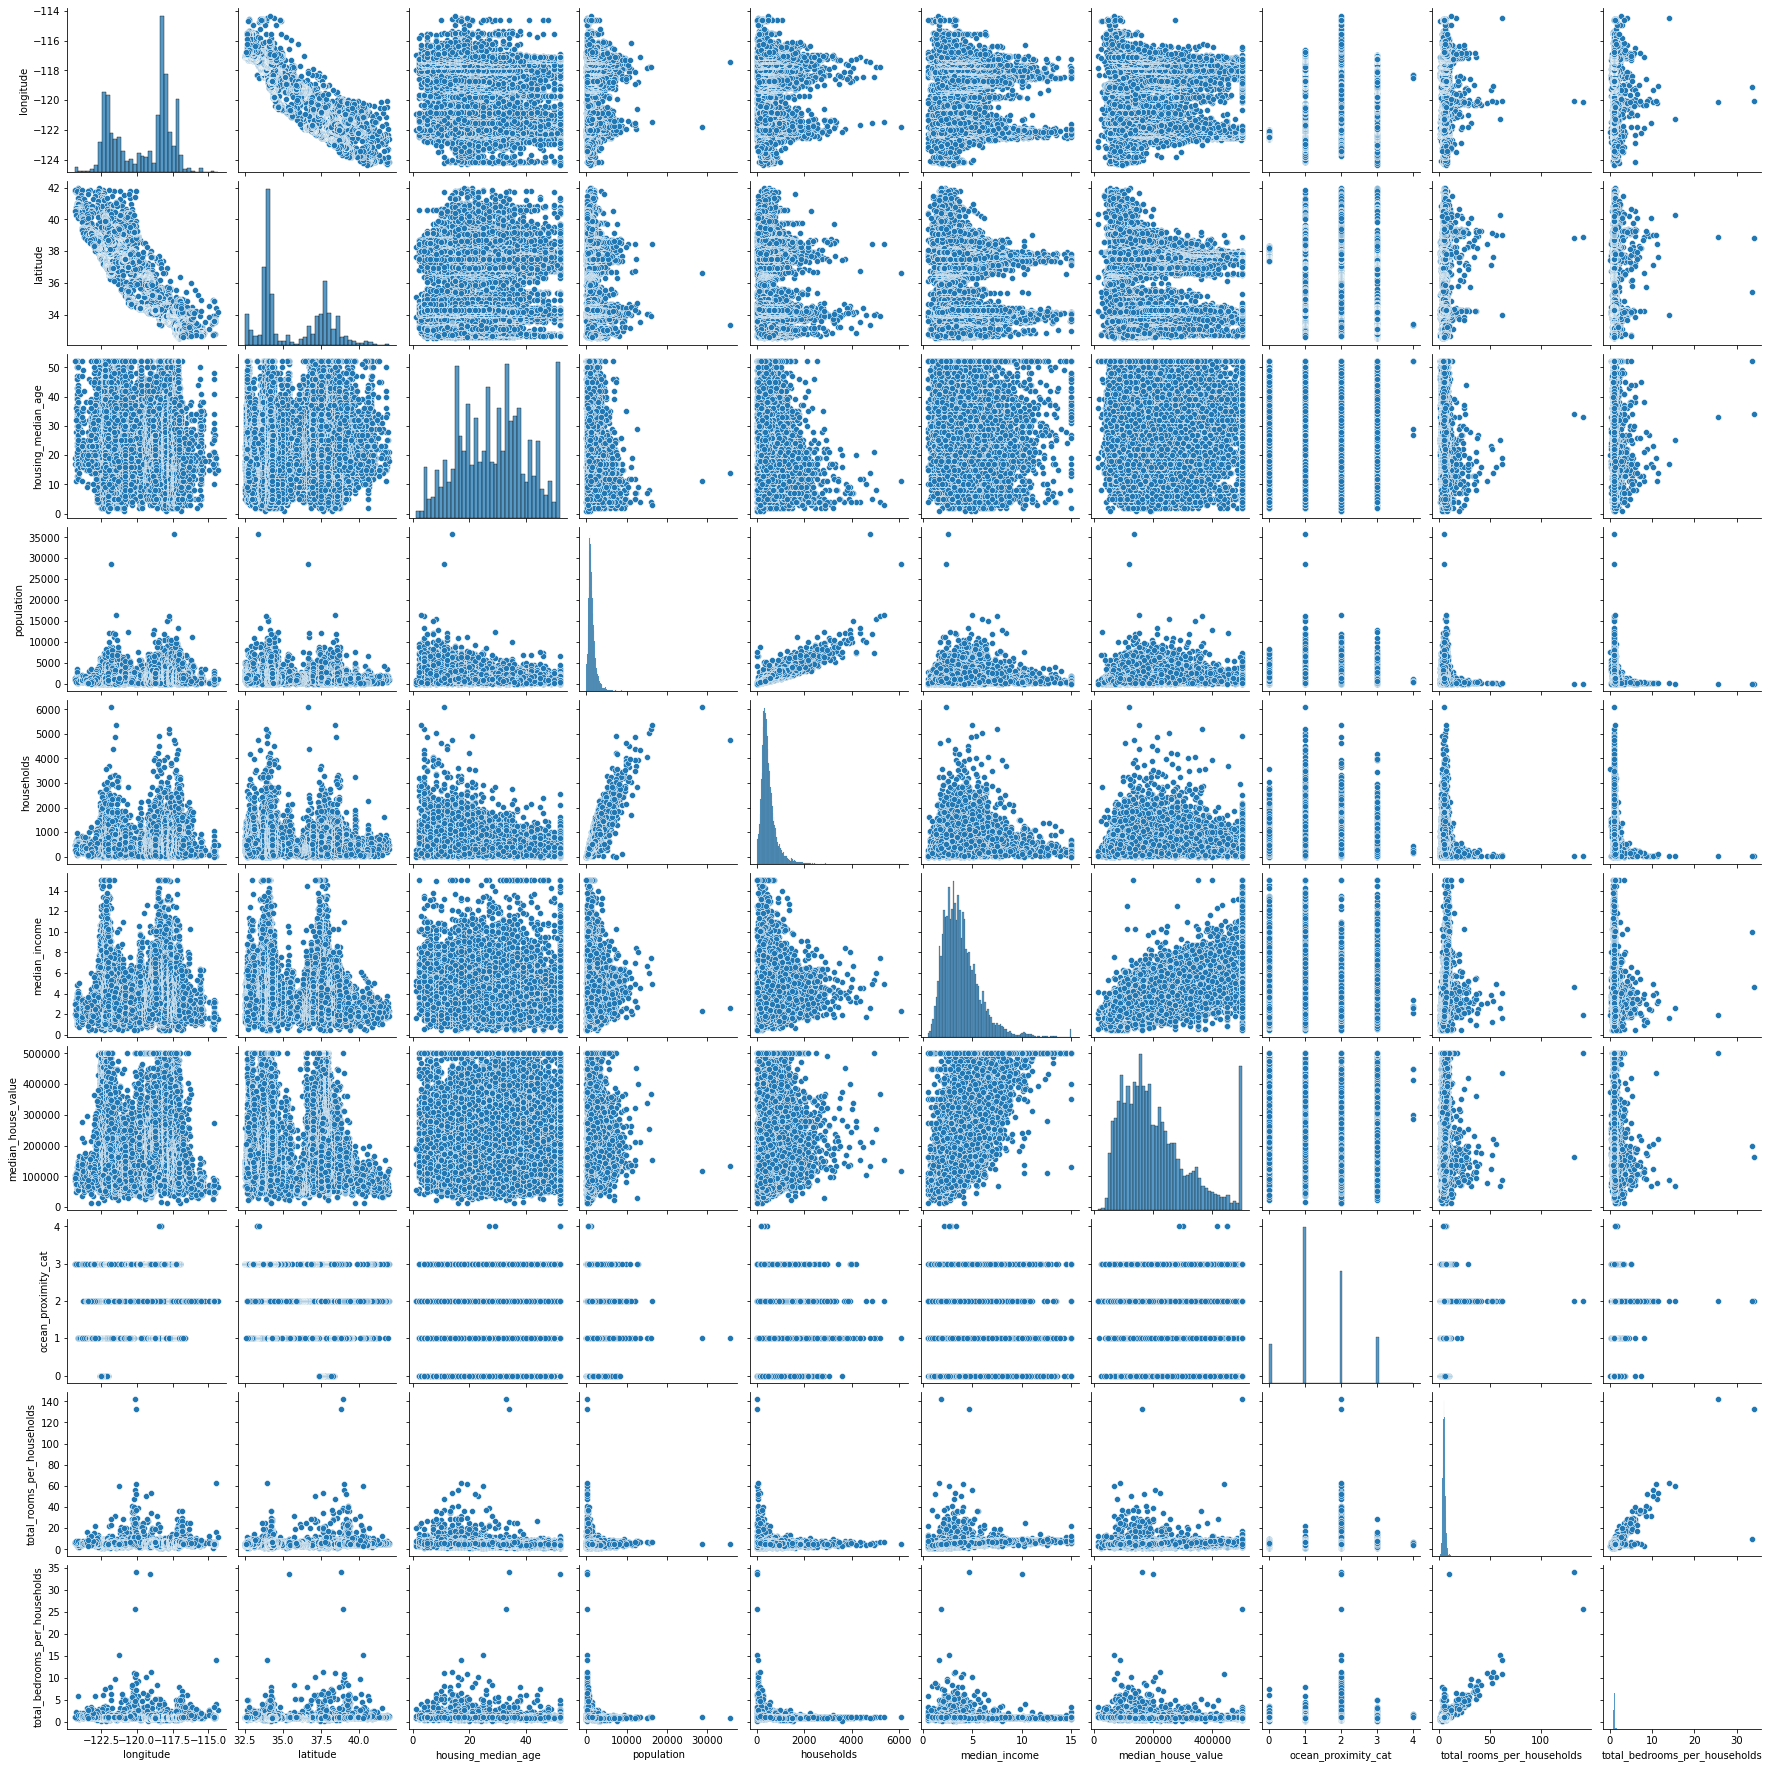

In [12]:
sns.pairplot(df)

<AxesSubplot:>

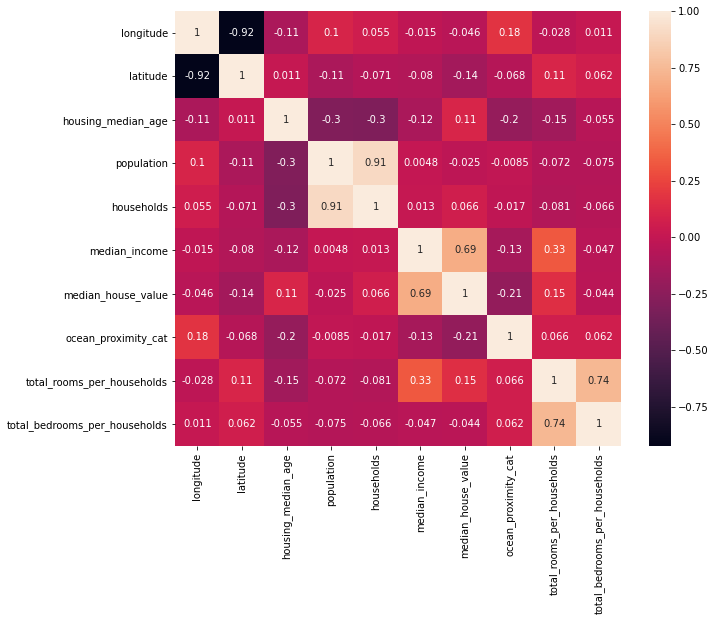

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

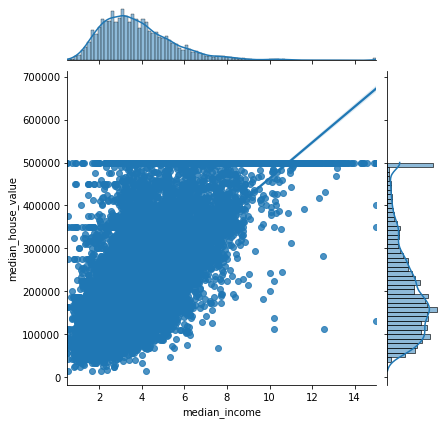

In [14]:
sns.jointplot(data=df,y='median_house_value',x='median_income',kind='reg')

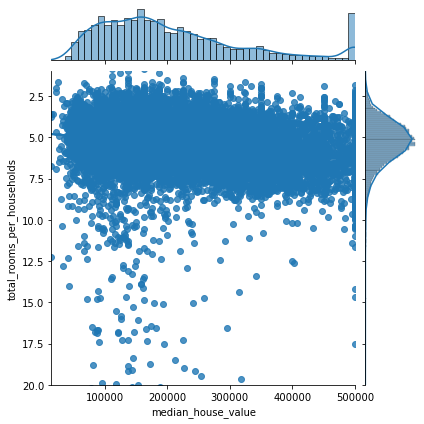

In [15]:
sns.jointplot(data=df,x='median_house_value',y='total_rooms_per_households',kind='reg',ylim=20)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

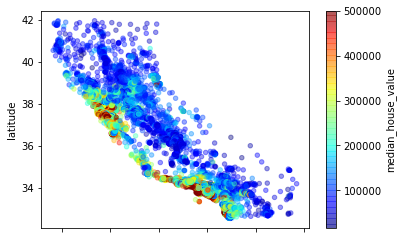

In [16]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,c='median_house_value',cmap=plt.get_cmap("jet"))

In [17]:
df[df['total_rooms_per_households'] > 20].shape

(69, 11)

In [18]:
df.drop(df[df['total_rooms_per_households'] > 20].index.to_list(), axis=0, inplace=True)

In [19]:
df.shape

(20571, 11)

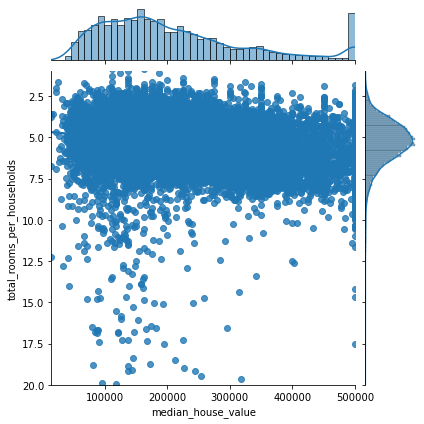

In [20]:
sns.jointplot(data=df,x='median_house_value',y='total_rooms_per_households',kind='reg',ylim=20)

**Divisão dos Dados em treino e teste**

In [21]:
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [23]:
X_train.shape

(16456, 9)

In [24]:
y_test.shape

(4115,)

**Escalonando os Dados**

In [25]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity_cat,total_rooms_per_households,total_bedrooms_per_households
0,-2.299096,2.425689,0.815839,-0.480159,-0.428766,-1.117637,1.786733,0.082801,-0.115515
1,-0.699175,0.967129,-1.561763,-0.788672,-0.851750,0.444213,0.622924,0.751326,-0.272374
2,1.319417,-1.340304,-1.561763,-0.424382,-0.514401,1.077333,-0.540886,0.550138,-0.212541
3,0.850905,-0.922903,-1.958029,-0.094082,0.549546,0.818786,-0.540886,-0.184016,-0.032276
4,-1.556454,1.558057,-1.561763,-0.799130,-0.818015,-0.392149,0.622924,0.930296,0.463772
...,...,...,...,...,...,...,...,...,...
4110,0.736269,-0.852554,0.578079,-0.519377,-0.452121,0.321827,-0.540886,-0.051695,-0.291415
4111,-1.362071,1.253213,1.529119,-0.187333,-0.127747,-0.476631,-1.704695,-0.211009,-0.091792
4112,-0.913495,1.393910,-0.293709,-0.264897,-0.055087,-0.701638,0.622924,-0.488921,0.068435
4113,-1.352102,1.009338,1.846133,-0.491488,-0.402816,-0.474266,-1.704695,-0.770188,-0.111036


**Testando os Modelos**

Regressão Linear

In [26]:
modelo_regressao_linear = LinearRegression()
modelo_regressao_linear.fit(X_train, y_train)
pred_rl = modelo_regressao_linear.predict(X_test)
pred_rl[:5]

array([107617.8067304 , 177337.61210373, 265994.82853939, 285280.53993987,
       140657.71210979])

In [27]:
y_test[:5]

2547      70500.0
19467    163700.0
14960    181300.0
10758    500001.0
3316      93400.0
Name: median_house_value, dtype: float64

In [28]:
modelo_regressao_linear.score(X_test, y_test)

0.6460799562532507

In [29]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_rl)))

RMSE 68843.46917715916


In [30]:
cross_rl = cross_val_score(modelo_regressao_linear, X_test, y_test, cv=10)
final_rl = sum(cross_rl) / len(cross_rl)
final_rl

0.6475436484965845

Árvore de Decisão

In [31]:
params_tree = [
    {
        'criterion':['mse', 'mae'],
        'max_depth':[None, 2, 4, 8, 15]
    }
]

modelo_tree = DecisionTreeRegressor(criterion='mae', max_depth=8)
# grid_search = GridSearchCV(modelo_tree, params_tree, cv=5)
# grid_search.fit(X_train,y_train)
# grid_search.best_params_

modelo_tree.fit(X_train,y_train)
pred_tree = modelo_tree.predict(X_test)

In [32]:
modelo_tree.score(X_test,y_test)

0.7138550699118702

In [33]:
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_tree)))

RMSE 61901.788281749126


In [34]:
cross_tree = cross_val_score(modelo_tree, X_test, y_test, cv=10)
final_tree = sum(cross_tree) / len(cross_tree)
final_tree

0.6016727081116352

Florestas Aleatórias

In [35]:
params_forest = [
    {
        'criterion':['mse', 'mae'],
        'max_depth':[None, 2, 4, 8]
    }
]

modelo_forest = RandomForestRegressor(max_depth=10)
# grid_search = GridSearchCV(modelo_forest, params_forest, cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
modelo_forest.fit(X_train, y_train)
pred_forest = modelo_forest.predict(X_test)

In [36]:
modelo_forest.score(X_test, y_test)

0.7921183076390385

In [37]:
print('RMSE', np.sqrt(mean_squared_error(y_test, pred_forest)))

RMSE 52761.64040454539


In [38]:
cross_forest = cross_val_score(modelo_forest, X_test, y_test, cv=10)
final_forest = sum(cross_forest) / len(cross_forest)
final_forest

0.7467040711905055

KNN

In [39]:
params_knn = [
    {
        'weights':['uniform','distance'],
        'n_neighbors':[2,5,10,15,20,30]
    }
]

modelo_knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
# grid_search = GridSearchCV(modelo_knn, params_knn, cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
modelo_knn.fit(X_train, y_train)
pred_knn = modelo_knn.predict(X_test)

In [40]:
modelo_knn.score(X_test, y_test)

0.7394374628946605

In [41]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_knn)))

RMSE 59069.8890261522


In [42]:
cross_knn = cross_val_score(modelo_knn, X_test, y_test, cv=10)
final_knn = sum(cross_knn) / len(cross_knn)
final_knn

0.6890733441414983

SVM

In [43]:
params_svm = [
    {
        'C':[0.1,1,10],
        'gamma':[0.1,1,10]
    }
]

modelo_svm = SVR()
# grid_search = GridSearchCV(modelo_svm, params_svm, cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
modelo_svm.fit(X_train, y_train)
pred_svm = modelo_svm.predict(X_test)

In [44]:
modelo_svm.score(X_test, y_test)

-0.04269716756548725

In [45]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_svm)))

RMSE 118165.11030155346


In [46]:
cross_svm = cross_val_score(modelo_svm, X_test, y_test, cv=10)
final_cross = sum(cross_svm) / len(cross_svm)
final_cross

-0.054011350569878824